# Problem 3.2 of FVMHP

Partial Python solution to Problem 3.2 of *Finite Volume Methods for Hyperbolic Problems*.

In [1]:
%matplotlib inline

In [2]:
from pylab import *
from numpy.linalg import eig, solve

In [3]:
def plot_pt(q, label, color='b'):
    plot([q[0]], [q[1]], 'o', color=color, label=label)

In [164]:
def solve_Rp(A,ql,qr):
    """
    Solve the Riemann problem for a 2x2 matrix A and given left and right states.
    """
    
    print('Matrix A:\n', A)
    
    # compute eigenvalues and vectors:
    evals, R = eig(A)
    
    # reorder if necessary so evals[0] <= evals[1]
    jorder = argsort(evals)  # indices in order needed to sort
    evals = evals[jorder]
    R = R[:,jorder]
    
    print('Eigenvalues of A:', evals)
    print('Matrix R of eigenvectors:\n',R)
    
    # check that problem is hyperbolic:
    assert isreal(evals).all(), '*** Eigenvalues are not real'
    condR = cond(R)
    print('Condition number of R is %g' % condR)
    assert cond(R) < 1e12, '*** Matrix probably is not diagonalizable'

    dq = qr - ql
    alpha = solve(R, dq)
    qm = ql + alpha[0]*R[:,0]
    
    print('alpha = ', alpha)
    print('qm = ', qm)
    
    figure(figsize=(6,5))
    plot_pt(ql,'ql','r')
    plot_pt(qr,'qr','g')
    plot_pt(qm,'qm','b')
    plot((ql[0],qm[0],qr[0]), (ql[1],qm[1],qr[1]), 'b')
    legend()
    grid(True)
    xlabel('first component of q')
    ylabel('second component of q')
    title('phase plane solution of Riemann problem')
    savefig('test1.png')
    
    #gets the first component of the solution at some (x,t)
    def get_q1(x,t):
        if x/t<evals[0]:
            return ql[0]
        elif x/t<evals[1]:
            return qm[0]
        else:
            return qr[0]
        
    def vget_q1(xvec,t):
        q = [get_q1(xv,t) for xv in xvec]
        return q   
        
    #gets the second component of the solution at some (x,t)
    def get_q2(x,t):
        if x/t<evals[0]:
            return ql[1]
        elif x/t<evals[1]:
            return qm[1]
        else:
            return qr[1]

    def vget_q2(xvec,t):
        q = [get_q2(xv,t) for xv in xvec]
        return q  
        
    figure(figsize=(6,5))
    t = 1
    xvec = linspace(evals[0]-1,evals[1]+1,10000)
    qvec1 = vget_q1(xvec,t)
    plot(xvec, qvec1, 'b')
    grid(True)
    xlabel('x')
    ylabel('first component of q(x,t)')
    title('solution of Riemann problem at time t=1')
    savefig('test2.png')
    
    figure(figsize=(6,5))
    t = 1
    qvec2 = vget_q2(xvec,t)
    plot(xvec, qvec2, 'b')
    grid(True)
    xlabel('x')
    ylabel('second component of q(x,t)')
    title('solution of Riemann problem at time t=1')
    savefig('test3.png')
    
    return qm

In [146]:
def get_qi(x,t):
        if x/t<1:
            return 3
        elif x/t<2:
            return 2
        else:
            return 1
vget_q=vectorize(get_qi)

In [147]:
vget_qi(linspace(-1,2,3))

array([3, 3, 1])

### Example usage retained from starter code

Matrix A:
 [[3 2]
 [0 1]]
Eigenvalues of A: [1. 3.]
Matrix R of eigenvectors:
 [[-0.70710678  1.        ]
 [ 0.70710678  0.        ]]
Condition number of R is 2.41421
alpha =  [2.82842712 3.        ]
qm =  [-1.  3.]


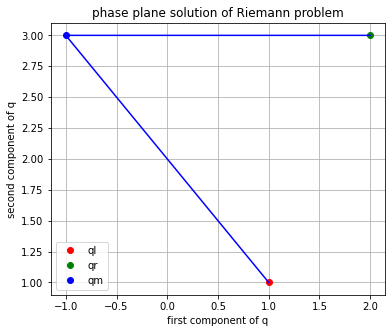

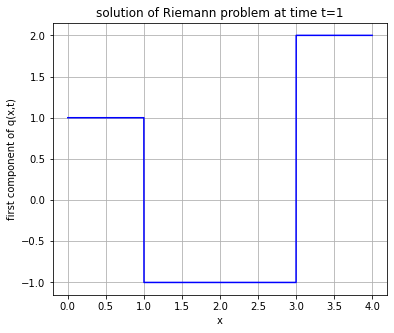

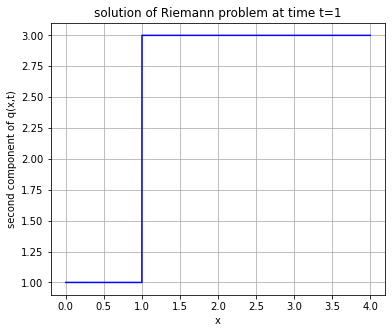

In [165]:
A = array([[3,2],[0,1]])
qleft = array([1,1])
qright = array([2,3])
qm = solve_Rp(A,qleft,qright)

### Problem 3.1 Part d

Matrix A:
 [[1 1]
 [1 1]]
Eigenvalues of A: [0. 2.]
Matrix R of eigenvectors:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Condition number of R is 1
alpha =  [-0.70710678  0.70710678]
qm =  [ 1.5 -0.5]


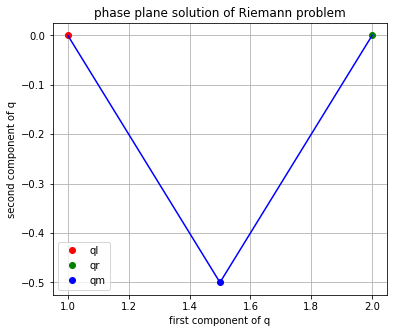

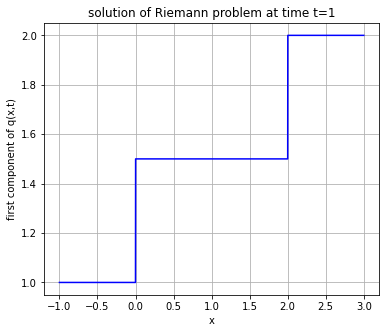

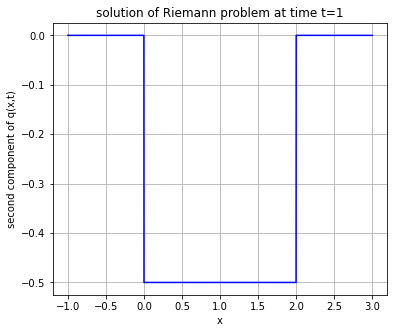

In [169]:
A = array([[1,1],[1,1]])
qleft = array([1,0])
qright = array([2,0])
qm = solve_Rp(A,qleft,qright)

### Problem 3.1 Part e

Matrix A:
 [[2 0]
 [0 2]]
Eigenvalues of A: [2. 2.]
Matrix R of eigenvectors:
 [[1. 0.]
 [0. 1.]]
Condition number of R is 1
alpha =  [ 1. -1.]
qm =  [1. 1.]


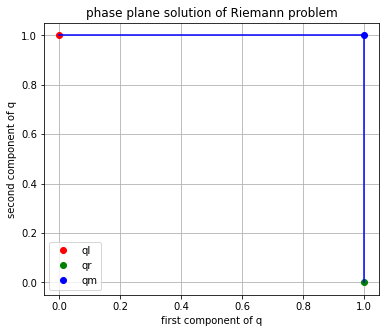

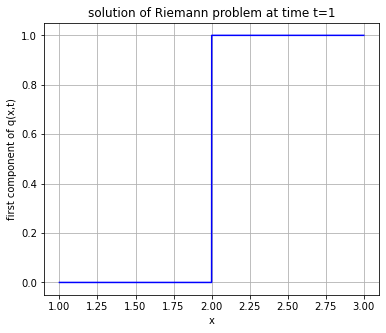

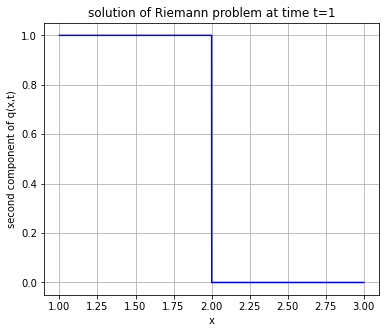

In [170]:
A = array([[2,0],[0,2]])
qleft = array([0,1])
qright = array([1,0])
qm = solve_Rp(A,qleft,qright)

### Problem 3.1 Part f

Matrix A:
 [[2.e+00 1.e+00]
 [1.e-04 2.e+00]]
Eigenvalues of A: [1.99 2.01]
Matrix R of eigenvectors:
 [[-0.99995    0.99995  ]
 [ 0.0099995  0.0099995]]
Condition number of R is 100
alpha =  [-50.50252494 -49.50247494]
qm =  [50.5    0.495]


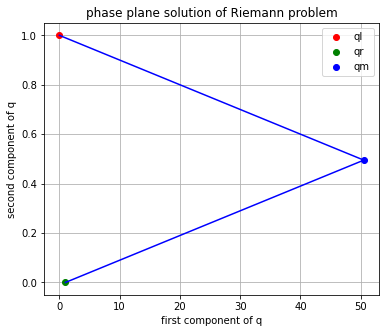

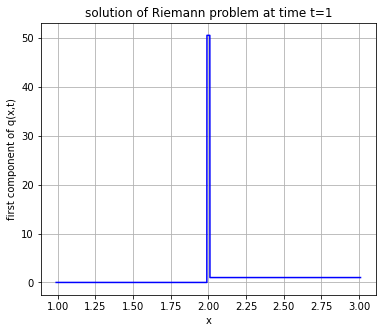

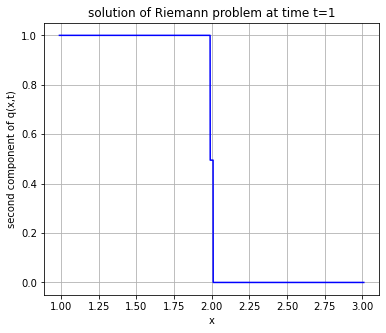

In [171]:
A = array([[2,1],[1e-4,2]])
qleft = array([0,1])
qright = array([1,0])
qm = solve_Rp(A,qleft,qright)

### A non-hyperbolic case which breaks as anticipated

In [172]:
A = array([[0,1],[-1,0]])
qleft = array([0,1])
qright = array([1,0])
qm = solve_Rp(A,qleft,qright)

Matrix A:
 [[ 0  1]
 [-1  0]]
Eigenvalues of A: [0.-1.j 0.+1.j]
Matrix R of eigenvectors:
 [[0.70710678-0.j         0.70710678+0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


AssertionError: *** Eigenvalues are not real